In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
seed = 222
np.random.seed(seed)

df = pd.read_csv('./data/csv/titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  roc_auc_score

def get_train_test(test_size = 0.9):
    y = 1 * (df.Sex == "male")
    X = df.drop(["Sex"],axis = 1)
    X = pd.get_dummies(X,sparse = True)
    X.drop(X.columns[X.std() == 0],axis = 1,inplace = True) 
    return train_test_split(X,y,test_size = test_size,random_state = seed)

xtrain,xtest,ytrain,ytest = get_train_test()

print("\n Example data:")
df.head()


 Example data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
print(xtrain)

     PassengerId  Survived  Pclass    Age  SibSp  Parch      Fare  \
879          880         1       1  56.00      0      1   83.1583   
97            98         1       1  23.00      0      1   63.3583   
205          206         0       3   2.00      0      1   10.4625   
860          861         0       3  41.00      2      0   14.1083   
6              7         0       1  54.00      0      0   51.8625   
579          580         1       3  32.00      0      0    7.9250   
494          495         0       3  21.00      0      0    8.0500   
46            47         0       3    NaN      1      0   15.5000   
704          705         0       3  26.00      1      0    7.8542   
114          115         0       3  17.00      0      0   14.4583   
840          841         0       3  20.00      0      0    7.9250   
51            52         0       3  21.00      0      0    7.8000   
858          859         1       3  24.00      0      3   19.2583   
188          189         0       3

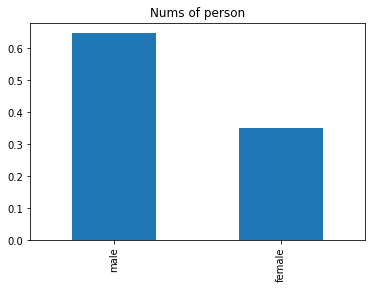

In [66]:
df.Sex.value_counts(normalize = True).plot(kind = 'bar',title = 'Nums of person')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 83.6+ KB


In [68]:
nan_list = df.isnull().sum().tolist()
sum(nan_list)

0

In [69]:
df['Age'].fillna('0.0',inplace = True)
df['Cabin'].fillna('0.0',inplace = True)
df['Embarked'].fillna('0.0',inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 83.6+ KB


In [18]:
type(df)

pandas.core.frame.DataFrame

In [34]:
nan_list = df.isnull().sum().tolist()
sum(nan_list)

0

# 构造决策树

In [70]:
import pydotplus
from IPython.display import Image
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [71]:
def print_graph(clf,feature_names):
    """ print decision tree"""
    graph = export_graphviz(clf,
                            label = "root",
                            proportion = True,
                            impurity = False,
                            out_file = None,
                           feature_names = feature_names,
                           class_names = {0:'f',1:'m'},
                           filled = True,
                           rounded = True
                           )
    graph = pydotplus.graph_from_dot_data(graph)
    return Image(graph.create_png())

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 83.6+ KB


In [72]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,0.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,0.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,0.0,S


In [79]:
xtrain = pd.DataFrame(xtrain)
nan_list = xtrain.isnull().sum().tolist()
sum(nan_list)

23.0

In [80]:
xtrain.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
879,880,1,1,56.0,0,1,83.1583,0,0,0,...,0,0,0,0,0,0,0,1,0,0
97,98,1,1,23.0,0,1,63.3583,0,0,0,...,0,0,0,0,0,0,0,1,0,0
205,206,0,3,2.0,0,1,10.4625,0,0,0,...,0,0,0,0,0,1,0,0,0,1
860,861,0,3,41.0,2,0,14.1083,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0,1,54.0,0,0,51.8625,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [81]:
xtrain['Age'].fillna('0.0',inplace = True)
xtrain['Fare'].fillna('0.0',inplace = True)
xtrain['SibSp'].fillna('0.0',inplace = True)

In [82]:
xtrain = pd.DataFrame(xtrain)
nan_list = xtrain.isnull().sum().tolist()
sum(nan_list)

0.0

In [83]:
ytrain = pd.DataFrame(ytrain)
nan_list = ytrain.isnull().sum().tolist()
sum(nan_list)

0

In [44]:
# xtest = pd.DataFrame(xtest)
# nan_list = xtest.isnull().sum().tolist()
# sum(nan_list)

154.0

In [73]:
xtrain.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
879,880,1,1,56.0,0,1,83.1583,0,0,0,...,0,0,0,0,0,0,0,1,0,0
97,98,1,1,23.0,0,1,63.3583,0,0,0,...,0,0,0,0,0,0,0,1,0,0
205,206,0,3,2.0,0,1,10.4625,0,0,0,...,0,0,0,0,0,1,0,0,0,1
860,861,0,3,41.0,2,0,14.1083,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0,1,54.0,0,0,51.8625,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
xtest.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 389 to 81
Columns: 1729 entries, PassengerId to Embarked_S
dtypes: Sparse[int32, 0](1722), float64(2), int64(5)
memory usage: 70.4 KB


In [75]:
xtest.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
389,390,1,2,17.0,0,0,12.0000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
666,667,0,2,25.0,0,0,13.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
878,879,0,3,NaN,0,0,7.8958,0,0,0,...,0,0,0,0,0,0,0,0,0,1
85,86,1,3,33.0,3,0,15.8500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
748,749,0,1,19.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [76]:
xtest['Age'].fillna('0.0',inplace = True)
xtest['Fare'].fillna('0.0',inplace = True)
xtest['SibSp'].fillna('0.0',inplace = True)

In [77]:
xtest = pd.DataFrame(xtest)
nan_list = xtest.isnull().sum().tolist()
sum(nan_list)

0.0

Decision tree ROC-AUC score ： 0.772


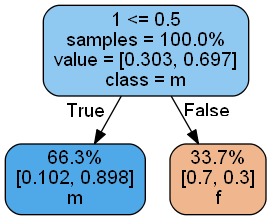

In [56]:
t1 = DecisionTreeClassifier(max_depth = 1,random_state = seed)
t1.fit(xtrain,ytrain)
p = t1.predict_proba(xtest)[:,1]

print("Decision tree ROC-AUC score ： %.3f" % roc_auc_score(ytest,p))
print_graph(t1,xtrain.columns)

Decision tree ROC-AUC score ： 0.771


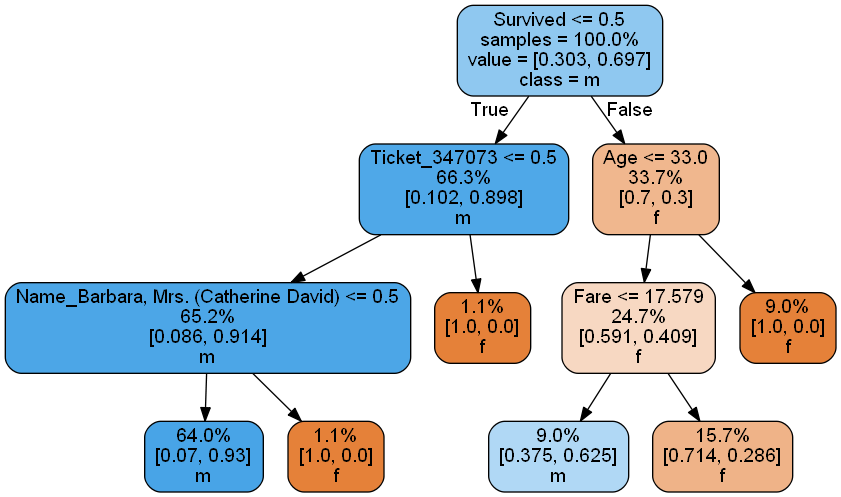

In [84]:
t2 = DecisionTreeClassifier(max_depth = 3,random_state = seed)
t2.fit(xtrain,ytrain)
p = t2.predict_proba(xtest)[:,1]

print("Decision tree ROC-AUC score ： %.3f" % roc_auc_score(ytest,p))
print_graph(t2,xtrain.columns)

调整策略，去掉对结果有最大影响的因素

Decision tree ROC_AUC score ： 0.641


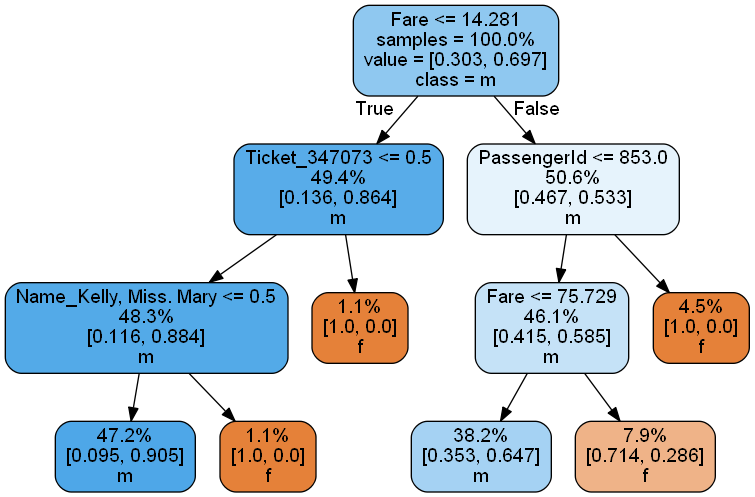

In [85]:
drop = ['Survived']

xtrain_slim = xtrain.drop(drop,1)
xtest_slim = xtest.drop(drop,1)

t3 = DecisionTreeClassifier(max_depth = 3,random_state = seed)
t3.fit(xtrain_slim,ytrain)
p = t3.predict_proba(xtest_slim)[:,1]

print("Decision tree ROC_AUC score ： %.3f" % roc_auc_score(ytest,p))
print_graph(t3,xtrain_slim.columns)

In [86]:
# 有两个三层的决策树，就可以集成了
p1 = t2.predict_proba(xtest)[:,1]    #  0.771
p2 = t3.predict_proba(xtest_slim)[:,1]   # 0.648
p = np.mean([p1,p2],axis = 0)
print("Average decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest,p))

Average decision tree ROC-AUC score: 0.794


# 应该选择不同的特征会生成不同的结果，然后用不同的结果进行组合得到一个升华，再多选几组就是随机森林了

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf = RandomForestClassifier(
    # 指定生成的决策树的个数
    n_estimators = 10,
    max_features = 3,
    random_state = seed
)

rf.fit(xtrain,ytrain)
p= rf.predict_proba(xtest)[:,1]
print("Average of decision tree ROC-AUC score : %.3f" % roc_auc_score(ytest,p))

Average of decision tree ROC-AUC score : 0.636


d:\python37\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [89]:
# 构造多个模型： 分类器
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline

In [90]:
def get_models():
    # 产生基础的学习器
    nb = GaussianNB()
    svc = SVC(C = 100,probability = True)
    knn = KNeighborsClassifier(n_neighbors = 3)
    lr = LogisticRegression(C = 100,random_state = seed)
    nn = MLPClassifier((80,10),early_stopping = False,random_state = seed)
    gb = GradientBoostingClassifier(n_estimators = 100,max_features = 3,
                                    random_state = seed)
    rf = RandomForestClassifier(n_estimators = 10,max_features = 3,
                                random_state = seed)
    
    # 构造一个字典，一个名字对应一个分类器
    models = {'svm':svc,
             'knn':knn,
             'naive bayes':nb,
             'random forest':rf,
             'mpl-nn':nn,
             'gbm':gb,
             'logistic':lr,
             }
    return models


def train_predict(model_list):
    # 对预测值p 进行初始化
    P = np.zeros((ytest.shape[0],len(model_list)))
    # 转换为DataFrame格式
    P = pd.DataFrame(P)
    
    print("Fitting models.")
    cols = list()
    for i,(name,m) in enumerate(models.items()):
        print("%s..." % name,end = " ",flush = False)
        m.fit(xtrain,ytrain)
        P.iloc[:,i] = m.predict_proba(xtest)[:,1]
        cols.append(name)
        print("done")
        
    P.columns = cols
    print('Done\n')
    return P

def score_models(P,y):
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y,P.loc[:,m])
        print("%-26s:%.3f" % (m,score))
        
    print("Done\n")

In [91]:
models = get_models()
P = train_predict(models)
score_models(P,ytest)

Fitting models.
svm... 

d:\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


done
knn... 

d:\python37\lib\site-packages\ipykernel_launcher.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


done
naive bayes... done

d:\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



random forest... done
mpl-nn... 

d:\python37\lib\site-packages\ipykernel_launcher.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
d:\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


done
gbm... 

d:\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


done
logistic... done
Done

Scoring models.
svm                       :0.562
knn                       :0.515
naive bayes               :0.747
random forest             :0.636
mpl-nn                    :0.657
gbm                       :0.784
logistic                  :0.777
Done



d:\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[MLENS] backend: threading


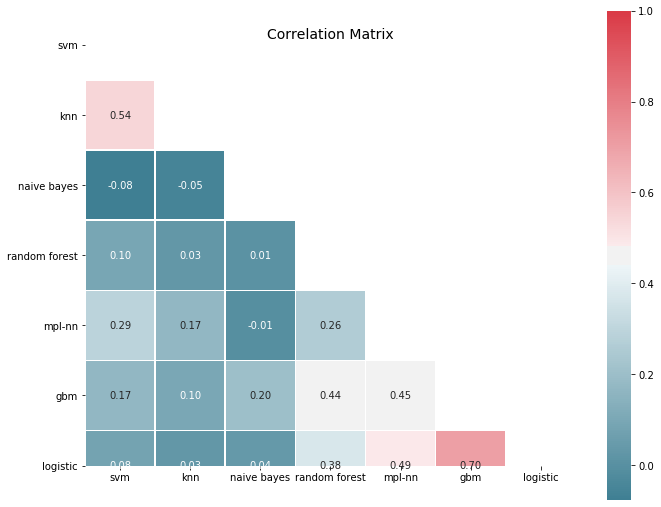

In [92]:
from mlens.visualization import corrmat

corrmat(P.corr(),inflate = False)
plt.show()

In [93]:
# 再进行集成
print("Ensemble ROC_AUC score : %.3f" % roc_auc_score(ytest,P.mean(axis = 1)))

Ensemble ROC_AUC score : 0.767


集成使得模型过拟合的风险更小

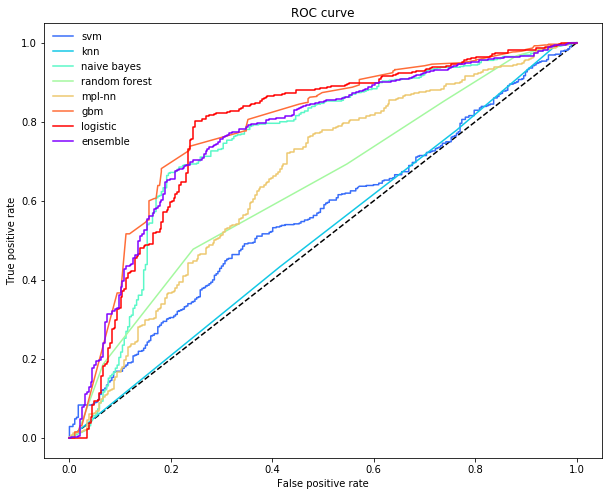

In [94]:
from sklearn.metrics import roc_curve

def plot_roc_curve(ytest,P_base_learners,P_ensemble,labels,ens_label):
    plt.figure(figsize = (10,8))
    # 先画出基本的线5:5
    plt.plot([0,1],[0,1],'k--')
    
    # 指定colormap
    cm = [plt.cm.rainbow(i)
         for i in np.linspace(0,1.0,P_base_learners.shape[1] + 1)]
    
    # 画基础线
    for i in  range(P_base_learners.shape[1]):
        p = P_base_learners[:,i]
        # false positive ;true positive ;
        fpr,tpr,_ = roc_curve(ytest,p)
        plt.plot(fpr,tpr,label = labels[i],c = cm[i + 1])
        
        
    # 画集成的线
    fpr,tpr,_ = roc_curve(ytest,P_ensemble)
    plt.plot(fpr,tpr,label = ens_label,c = cm[0])
    
    
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend(frameon = False)
    
plot_roc_curve(ytest,P.values,P.mean(axis = 1),list(P.columns),"ensemble")

# 划分训练集和测试集，会使我们丧失一部分数据，也能满足我们的需求
# 可以用交叉验证来解决

In [95]:
from sklearn.base import clone

def stacking(base_learners,meta_learner,X,y,generator):
    
    print("Fitting final base learners ... ",end = "")
    train_base_learners(base_learners,X,y,verbose = False)
    print("done")
    
    print("Generate cross-validated predictions ...")
    # 交叉验证
    cv_preds,cv_y = [],[]
    # 指定交叉验证的方法
    # 先把数据集进行分割
    for i,(train_idx,test_idx) in enumerate(generator.split(X)):
       
        fold_xtrain,fold_ytrain = X[train_idx,:],y[train_idx]
        fold_xtest,fold_ytest = X[test_idx,:],y[test_idx]
        
        
        fold_base_learners = {name:clone(model)
                             for name,model in base_learners.items()}
        train_base_learners(fold_base_learners,fold_xtrain,verbose = False)
        
        fold_P_base = predict_base_learners(fold_base_learners,
                                           fold_xtest,verbose = False)
        
        cv_preds.append(fold_P_base)
        cv_y.append(fold_ytest)
        print("Fold %i done" % (i+1))
        
    print("CV-predictions done.")
    
    cv_preds = np.vstack(cv_preds)
    cv_y = np.hstack(cv_y)
    
    # train meta learner
    print("Fitting meta learner...",end = "")
    meta_learner.fit(cv_preds,cv_y)
    print("done.")
    
    
    return base_learners,meta_learner

In [97]:
from sklearn.model_selection import KFold

# Train with stacking
cv_base_learners,cv_meta_learner = stacking(
get_models(),clone(meta_learner),xtrain.values,ytrain.values,KFold(2))

P_pred,p = ensemble_predict(cv_base_learners,cv_meta_learner,xtest,verbose = False)
print("\nEnsemble ROC_AUC score :%.3f" % roc_auc_score(ytest,p))

NameError: name 'meta_learner' is not defined